In [93]:
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
data = pd.read_csv('AAPL.csv' , sep = ',')

Добавим для сравнения акции других крупных компаний из техносферы и сравним так же с индексом S&P500

In [95]:
data_sp = pd.read_csv('sphist.csv', sep=',')
data_gg = pd.read_csv('GOOGL.csv', sep=',')
data_ms = pd.read_csv('MSFT.csv', sep=',')

In [96]:
data_cl = data[['Date' , 'Close']]
data_cl['Date'] = pd.to_datetime(data_cl.Date)

data_cl_sp = data_sp[['Date' , 'Close']]
data_cl_sp['Date'] = pd.to_datetime(data_cl_sp.Date)

data_cl_gg = data_gg[['Date' , 'Close']]
data_cl_gg['Date'] = pd.to_datetime(data_cl_gg.Date)

data_cl_ms = data_ms[['Date' , 'Close']]
data_cl_ms['Date'] = pd.to_datetime(data_cl_ms.Date)

/var/folders/gk/x3lybh1s1v180w77tpp266sr0000gn/T/ipykernel_7215/1632885260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cl['Date'] = pd.to_datetime(data_cl.Date)
/var/folders/gk/x3lybh1s1v180w77tpp266sr0000gn/T/ipykernel_7215/1632885260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cl_sp['Date'] = pd.to_datetime(data_cl_sp.Date)
/var/folders/gk/x3lybh1s1v180w77tpp266sr0000gn/T/ipykernel_7215/1632885260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [97]:
data_cl['prev_close'] = data['Close'].shift(1)
data_cl['chng_percent'] = data_cl['Close']/data_cl['prev_close']

data_cl_sp['prev_close'] = data_sp['Close'].shift(1)
data_cl_sp['chng_percent'] = data_cl_sp['Close']/data_cl_sp['prev_close']

data_cl_gg['prev_close'] = data_gg['Close'].shift(1)
data_cl_gg['chng_percent'] = data_cl_gg['Close']/data_cl_gg['prev_close']

data_cl_ms['prev_close'] = data_ms['Close'].shift(1)
data_cl_ms['chng_percent'] = data_cl_ms['Close']/data_cl_ms['prev_close']

/var/folders/gk/x3lybh1s1v180w77tpp266sr0000gn/T/ipykernel_7215/2666646671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cl['prev_close'] = data['Close'].shift(1)
/var/folders/gk/x3lybh1s1v180w77tpp266sr0000gn/T/ipykernel_7215/2666646671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cl['chng_percent'] = data_cl['Close']/data_cl['prev_close']
/var/folders/gk/x3lybh1s1v180w77tpp266sr0000gn/T/ipykernel_7215/2666646671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

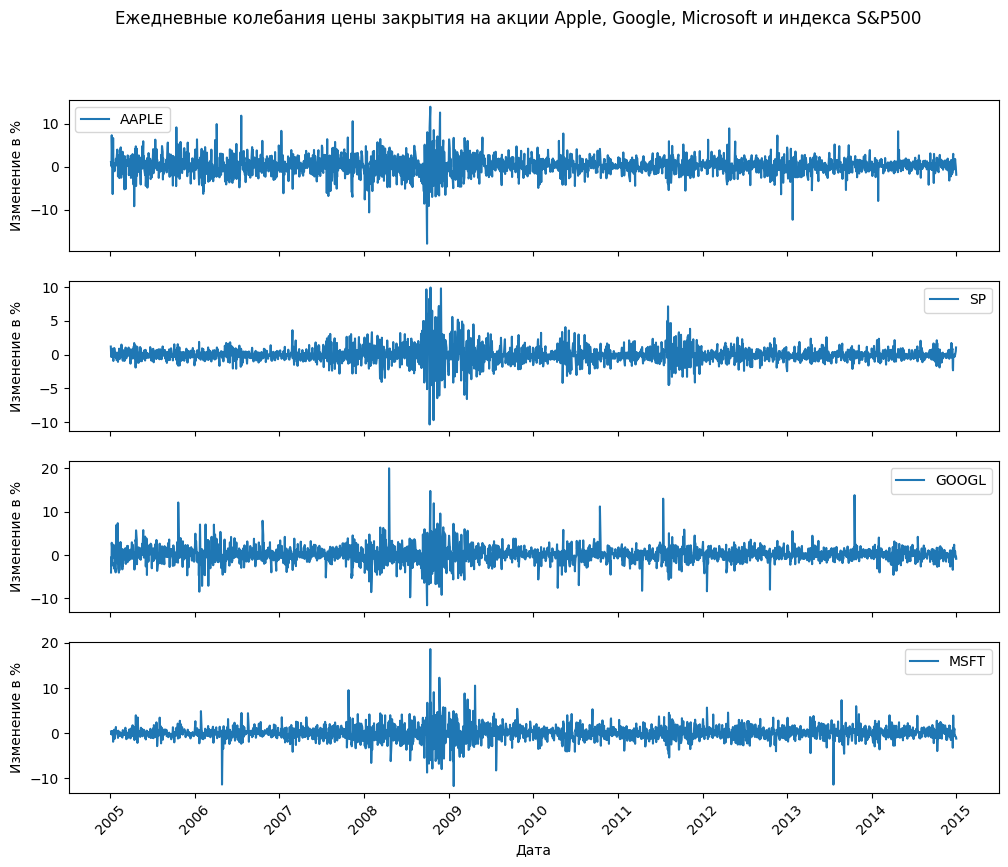

In [98]:
df = data_cl[(data_cl['Date'] >= pd.to_datetime('2005-01-01')) & (data_cl['Date'] <= pd.to_datetime('2015-01-01'))]
df_sp = data_cl_sp[(data_cl_sp['Date'] >= pd.to_datetime('2005-01-01')) & (data_cl_sp['Date'] <= pd.to_datetime('2015-01-01'))]
df_gg = data_cl_gg[(data_cl_gg['Date'] >= pd.to_datetime('2005-01-01')) & (data_cl_gg['Date'] <= pd.to_datetime('2015-01-01'))]
df_ms = data_cl_ms[(data_cl_ms['Date'] >= pd.to_datetime('2005-01-01')) & (data_cl_ms['Date'] <= pd.to_datetime('2015-01-01'))]

df.set_index('Date', inplace=True)
df_sp.set_index('Date', inplace=True)
df_gg.set_index('Date', inplace=True)
df_ms.set_index('Date', inplace=True)

df_plot = pd.DataFrame({
    'AAPLE': (df['Close'] / df['Close'].shift(1) - 1) * 100,
    'SP': (df_sp['Close'] / df_sp['Close'].shift(1) - 1) * 100,
    'GOOGL': (df_gg['Close'] / df_gg['Close'].shift(1) - 1) * 100,
    'MSFT': (df_ms['Close'] / df_ms['Close'].shift(1) - 1) * 100,
})

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 9), sharex=True)

ax1.plot(df_plot['AAPLE'], label='AAPLE')
ax1.set_ylabel("Изменение в %")
ax1.legend()

ax2.plot(df_plot['SP'], label='SP')
ax2.set_ylabel("Изменение в %")
ax2.legend()

ax3.plot(df_plot['GOOGL'], label='GOOGL')
ax3.set_ylabel("Изменение в %")
ax3.legend()

ax4.plot(df_plot['MSFT'], label='MSFT')
ax4.set_xlabel("Дата")
ax4.set_ylabel("Изменение в %")
ax4.legend()

plt.suptitle("Ежедневные колебания цены закрытия на акции Apple, Google, Microsoft и индекса S&P500")
plt.xticks(rotation=45)
plt.show()

Сезонности нет, но общие мировые тренды явно оказывают влияние на идекс, например кризис 2008 года

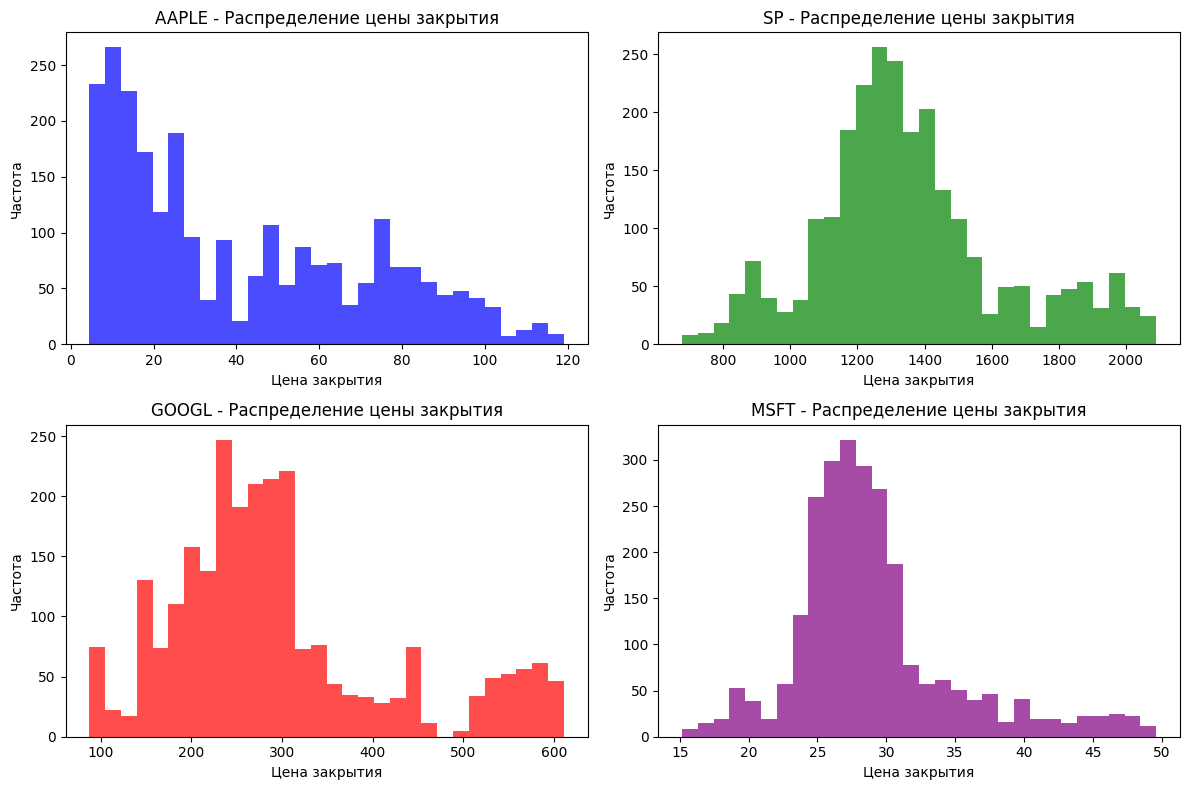

In [99]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df['Close'], bins=30, color='blue', alpha=0.7)
plt.title('AAPLE - Распределение цены закрытия')
plt.xlabel('Цена закрытия')
plt.ylabel('Частота')

plt.subplot(2, 2, 2)
plt.hist(df_sp['Close'], bins=30, color='green', alpha=0.7)
plt.title('SP - Распределение цены закрытия')
plt.xlabel('Цена закрытия')
plt.ylabel('Частота')

plt.subplot(2, 2, 3)
plt.hist(df_gg['Close'], bins=30, color='red', alpha=0.7)
plt.title('GOOGL - Распределение цены закрытия')
plt.xlabel('Цена закрытия')
plt.ylabel('Частота')

plt.subplot(2, 2, 4)
plt.hist(df_ms['Close'], bins=30, color='purple', alpha=0.7)
plt.title('MSFT - Распределение цены закрытия')
plt.xlabel('Цена закрытия')
plt.ylabel('Частота')

plt.tight_layout()

Text(0.5, 1.0, 'Матрица коорреляции цены закрытия')

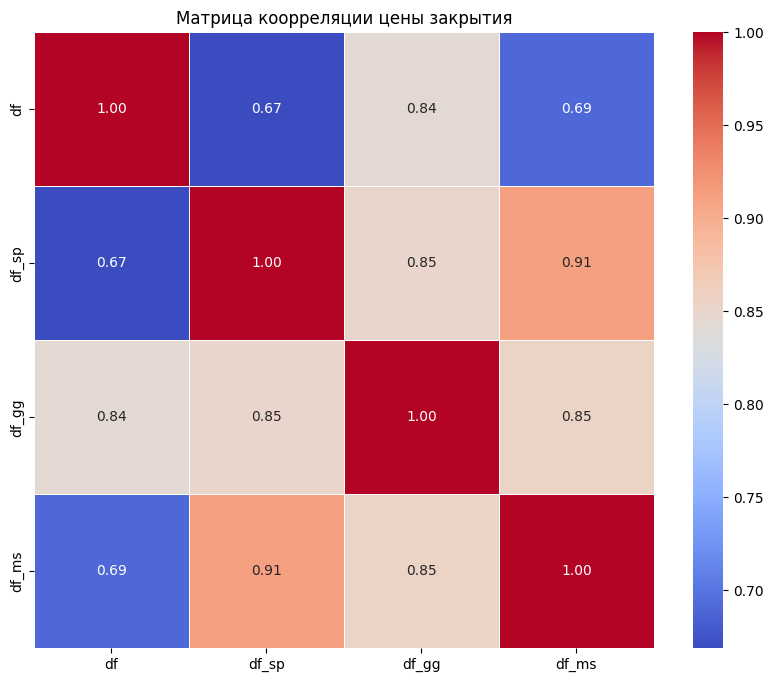

In [108]:
corr_data = pd.DataFrame({
    'df': df['Close'],
    'df_sp': df_sp['Close'],
    'df_gg': df_gg['Close'],
    'df_ms': df_ms['Close']
})

correlation_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица коорреляции цены закрытия')

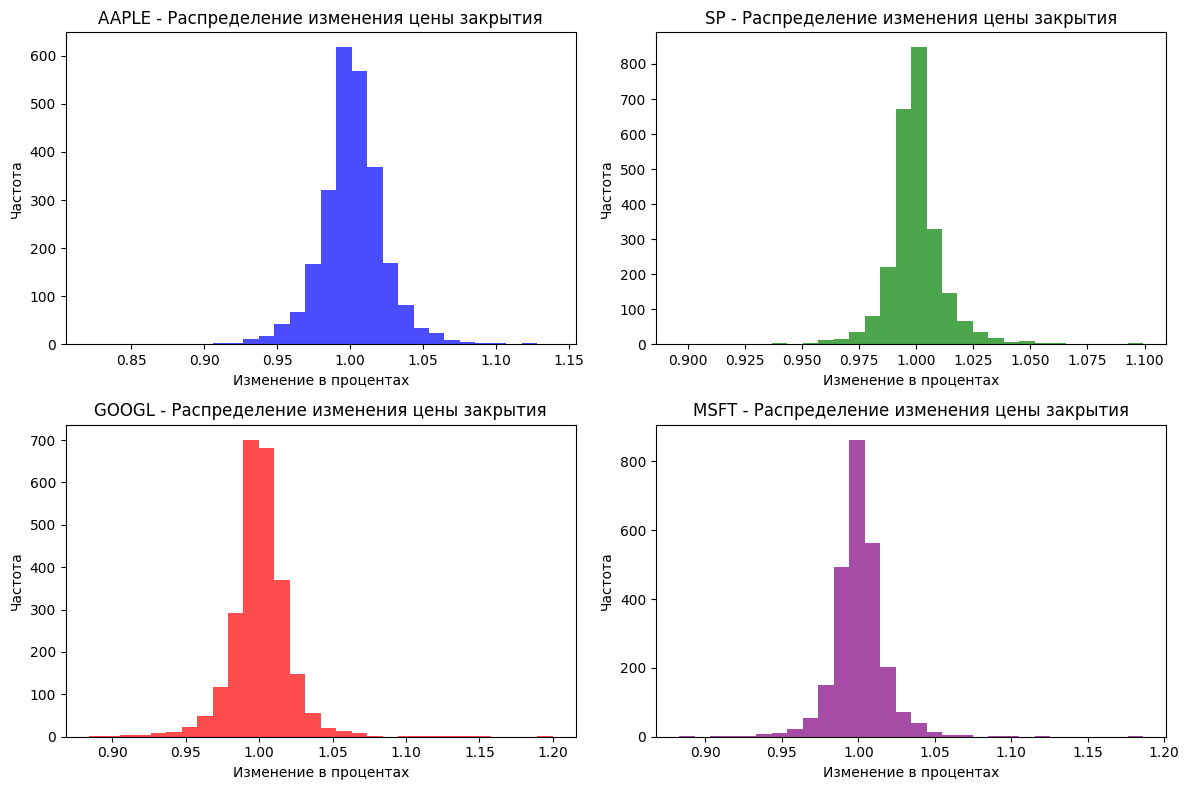

In [100]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df['chng_percent'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('AAPLE - Распределение изменения цены закрытия')
plt.xlabel('Изменение в процентах')
plt.ylabel('Частота')

plt.subplot(2, 2, 2)
plt.hist(df_sp['chng_percent'].dropna(), bins=30, color='green', alpha=0.7)
plt.title('SP - Распределение изменения цены закрытия')
plt.xlabel('Изменение в процентах')
plt.ylabel('Частота')

plt.subplot(2, 2, 3)
plt.hist(df_gg['chng_percent'].dropna(), bins=30, color='red', alpha=0.7)
plt.title('GOOGL - Распределение изменения цены закрытия')
plt.xlabel('Изменение в процентах')
plt.ylabel('Частота')

plt.subplot(2, 2, 4)
plt.hist(df_ms['chng_percent'].dropna(), bins=30, color='purple', alpha=0.7)
plt.title('MSFT - Распределение изменения цены закрытия')
plt.xlabel('Изменение в процентах')
plt.ylabel('Частота')

plt.tight_layout()

Text(0.5, 1.0, 'Матрица коорреляции изменения цены закрытия')

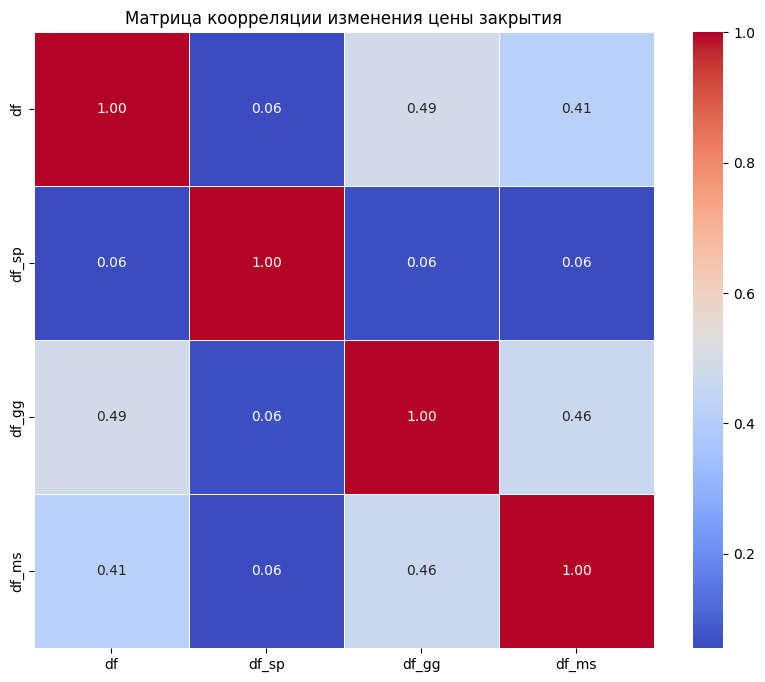

In [107]:
corr_data = pd.DataFrame({
    'df': df['chng_percent'],
    'df_sp': df_sp['chng_percent'],
    'df_gg': df_gg['chng_percent'],
    'df_ms': df_ms['chng_percent']
})

correlation_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица коорреляции изменения цены закрытия')

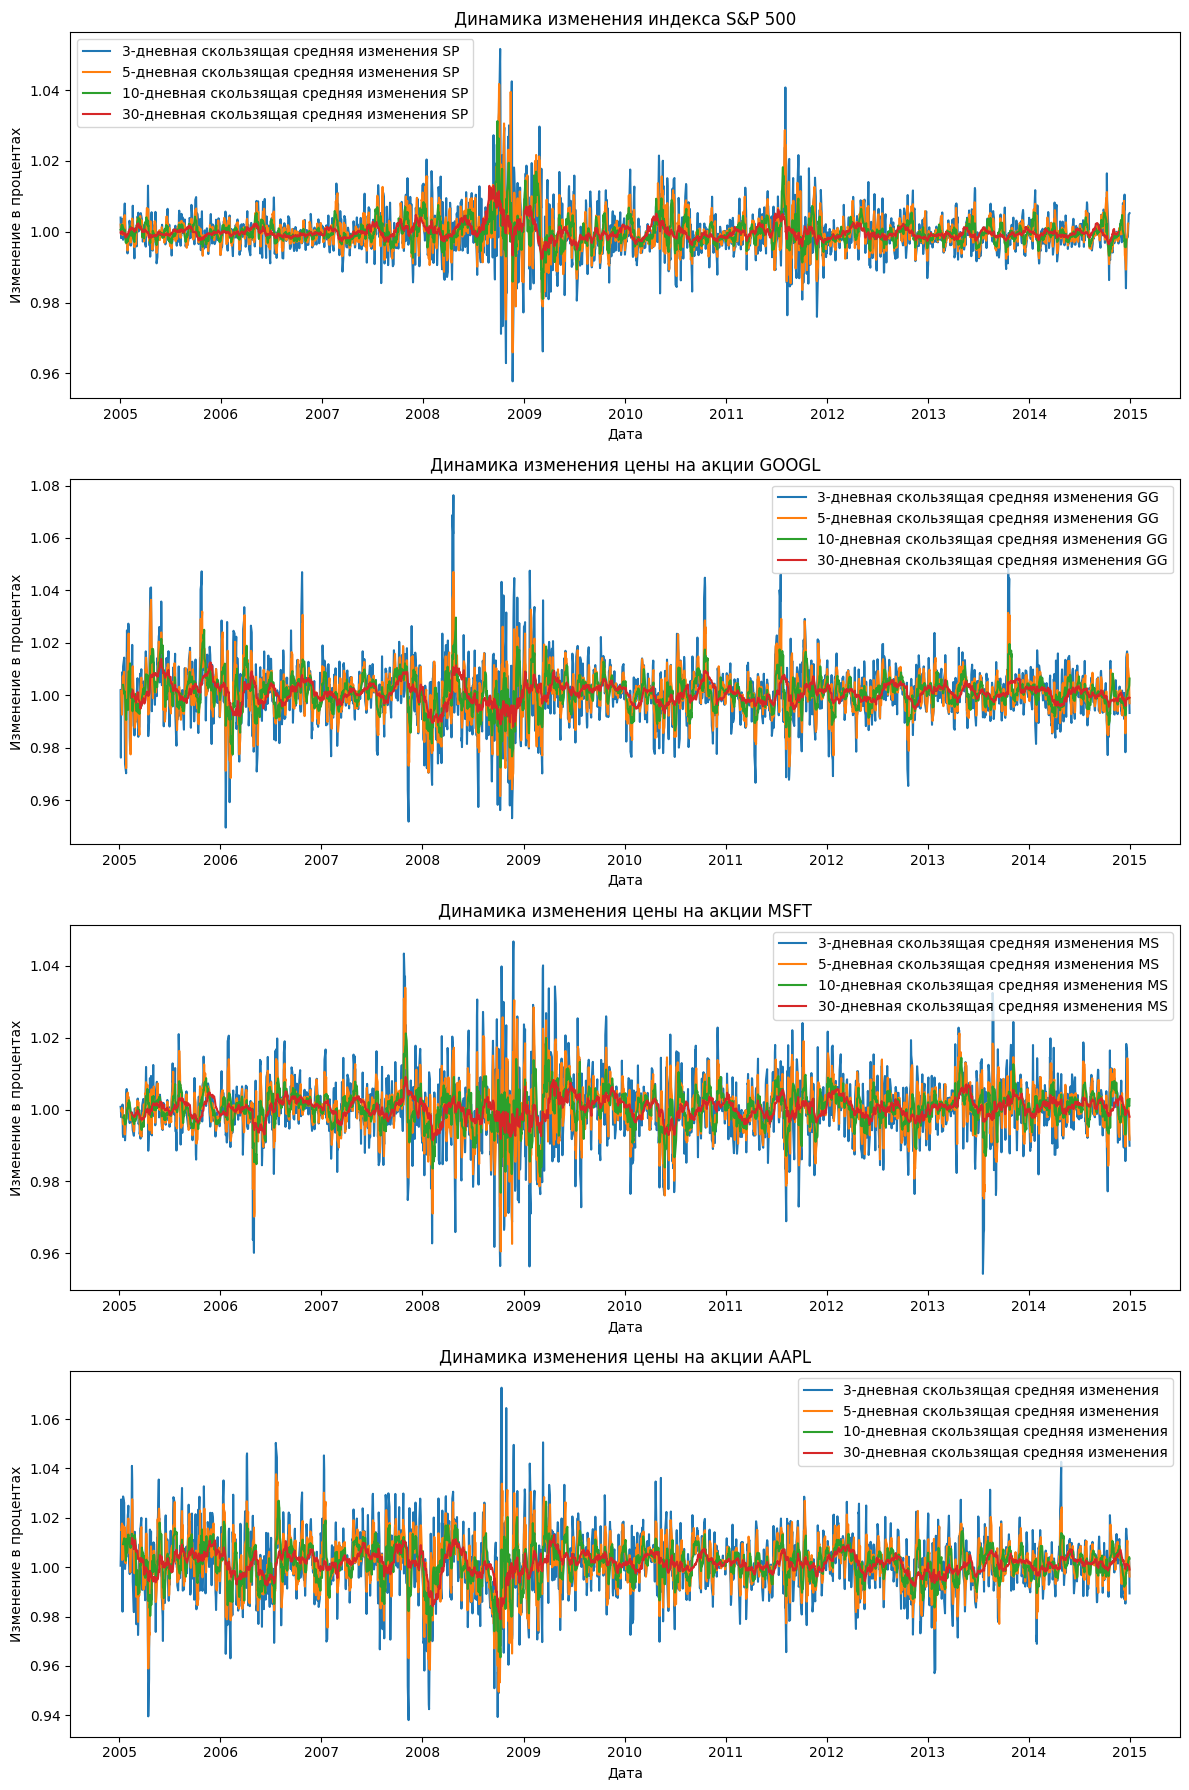

In [51]:
data_cl["chng_per_mean_3"] = data_cl["chng_percent"].rolling(window=3).mean()
data_cl["chng_per_mean_5"] = data_cl["chng_percent"].rolling(window=5).mean()
data_cl["chng_per_mean_10"] = data_cl["chng_percent"].rolling(window=10).mean()
data_cl["chng_per_mean_30"] = data_cl["chng_percent"].rolling(window=30).mean()

df_plot = data_cl.copy()
df_plot.set_index('Date', inplace=True)

data_cl["chng_per_std_3"] = data_cl["chng_percent"].rolling(window=3).std()
data_cl["chng_per_std_5"] = data_cl["chng_percent"].rolling(window=5).std()
data_cl["chng_per_std_10"] = data_cl["chng_percent"].rolling(window=10).std()
data_cl["chng_per_std_30"] = data_cl["chng_percent"].rolling(window=30).std()

data_cl_sp["chng_per_mean_3"] = data_cl_sp["chng_percent"].rolling(window=3).mean()
data_cl_sp["chng_per_mean_5"] = data_cl_sp["chng_percent"].rolling(window=5).mean()
data_cl_sp["chng_per_mean_10"] = data_cl_sp["chng_percent"].rolling(window=10).mean()
data_cl_sp["chng_per_mean_30"] = data_cl_sp["chng_percent"].rolling(window=30).mean()

data_cl_sp["chng_per_std_3"] = data_cl_sp["chng_percent"].rolling(window=3).std()
data_cl_sp["chng_per_std_5"] = data_cl_sp["chng_percent"].rolling(window=5).std()
data_cl_sp["chng_per_std_10"] = data_cl_sp["chng_percent"].rolling(window=10).std()
data_cl_sp["chng_per_std_30"] = data_cl_sp["chng_percent"].rolling(window=30).std()

df_plot_sp = data_cl_sp.copy()
df_plot_sp.set_index('Date', inplace=True)

data_cl_gg["chng_per_mean_3"] = data_cl_gg["chng_percent"].rolling(window=3).mean()
data_cl_gg["chng_per_mean_5"] = data_cl_gg["chng_percent"].rolling(window=5).mean()
data_cl_gg["chng_per_mean_10"] = data_cl_gg["chng_percent"].rolling(window=10).mean()
data_cl_gg["chng_per_mean_30"] = data_cl_gg["chng_percent"].rolling(window=30).mean()

data_cl_gg["chng_per_std_3"] = data_cl_gg["chng_percent"].rolling(window=3).std()
data_cl_gg["chng_per_std_5"] = data_cl_gg["chng_percent"].rolling(window=5).std()
data_cl_gg["chng_per_std_10"] = data_cl_gg["chng_percent"].rolling(window=10).std()
data_cl_gg["chng_per_std_30"] = data_cl_gg["chng_percent"].rolling(window=30).std()

df_plot_gg = data_cl_gg.copy()
df_plot_gg.set_index('Date', inplace=True)

data_cl_ms["chng_per_mean_3"] = data_cl_ms["chng_percent"].rolling(window=3).mean()
data_cl_ms["chng_per_mean_5"] = data_cl_ms["chng_percent"].rolling(window=5).mean()
data_cl_ms["chng_per_mean_10"] = data_cl_ms["chng_percent"].rolling(window=10).mean()
data_cl_ms["chng_per_mean_30"] = data_cl_ms["chng_percent"].rolling(window=30).mean()

data_cl_ms["chng_per_std_3"] = data_cl_ms["chng_percent"].rolling(window=3).std()
data_cl_ms["chng_per_std_5"] = data_cl_ms["chng_percent"].rolling(window=5).std()
data_cl_ms["chng_per_std_10"] = data_cl_ms["chng_percent"].rolling(window=10).std()
data_cl_ms["chng_per_std_30"] = data_cl_ms["chng_percent"].rolling(window=30).std()

df_plot_ms = data_cl_ms.copy()
df_plot_ms.set_index('Date', inplace=True)

plt.figure(figsize=(12, 18))

plt.subplot(4, 1, 1)
plt.plot(df_plot_sp["chng_per_mean_3"], label="3-дневная скользящая средняя изменения SP") 
plt.plot(df_plot_sp["chng_per_mean_5"], label="5-дневная скользящая средняя изменения SP") 
plt.plot(df_plot_sp["chng_per_mean_10"], label="10-дневная скользящая средняя изменения SP") 
plt.plot(df_plot_sp["chng_per_mean_30"], label="30-дневная скользящая средняя изменения SP") 
plt.xlabel("Дата")
plt.ylabel("Изменение в процентах") 
plt.title("Динамика изменения индекса S&P 500") 
plt.legend() 

plt.subplot(4, 1, 2)
plt.plot(df_plot_gg["chng_per_mean_3"], label="3-дневная скользящая средняя изменения GG") 
plt.plot(df_plot_gg["chng_per_mean_5"], label="5-дневная скользящая средняя изменения GG") 
plt.plot(df_plot_gg["chng_per_mean_10"], label="10-дневная скользящая средняя изменения GG") 
plt.plot(df_plot_gg["chng_per_mean_30"], label="30-дневная скользящая средняя изменения GG") 
plt.xlabel("Дата")
plt.ylabel("Изменение в процентах") 
plt.title("Динамика изменения цены на акции GOOGL") 
plt.legend() 

plt.subplot(4, 1, 3)
plt.plot(df_plot_ms["chng_per_mean_3"], label="3-дневная скользящая средняя изменения MS") 
plt.plot(df_plot_ms["chng_per_mean_5"], label="5-дневная скользящая средняя изменения MS") 
plt.plot(df_plot_ms["chng_per_mean_10"], label="10-дневная скользящая средняя изменения MS") 
plt.plot(df_plot_ms["chng_per_mean_30"], label="30-дневная скользящая средняя изменения MS") 
plt.xlabel("Дата")
plt.ylabel("Изменение в процентах") 
plt.title("Динамика изменения цены на акции MSFT") 
plt.legend() 

plt.subplot(4, 1, 4)
plt.plot(df_plot["chng_per_mean_3"], label="3-дневная скользящая средняя изменения") 
plt.plot(df_plot["chng_per_mean_5"], label="5-дневная скользящая средняя изменения") 
plt.plot(df_plot["chng_per_mean_10"], label="10-дневная скользящая средняя изменения") 
plt.plot(df_plot["chng_per_mean_30"], label="30-дневная скользящая средняя изменения") 
plt.title("Динамика изменения цены на акции AAPL") 
plt.xlabel("Дата")
plt.ylabel("Изменение в процентах") 
plt.legend() 

plt.tight_layout()

Вообще, скользящие средние обычно используются с данными временных рядов для сглаживания краткосрочных колебаний, поэтому на таком масштабе не очень заметно, посмотрим на более узкий промежуток времени

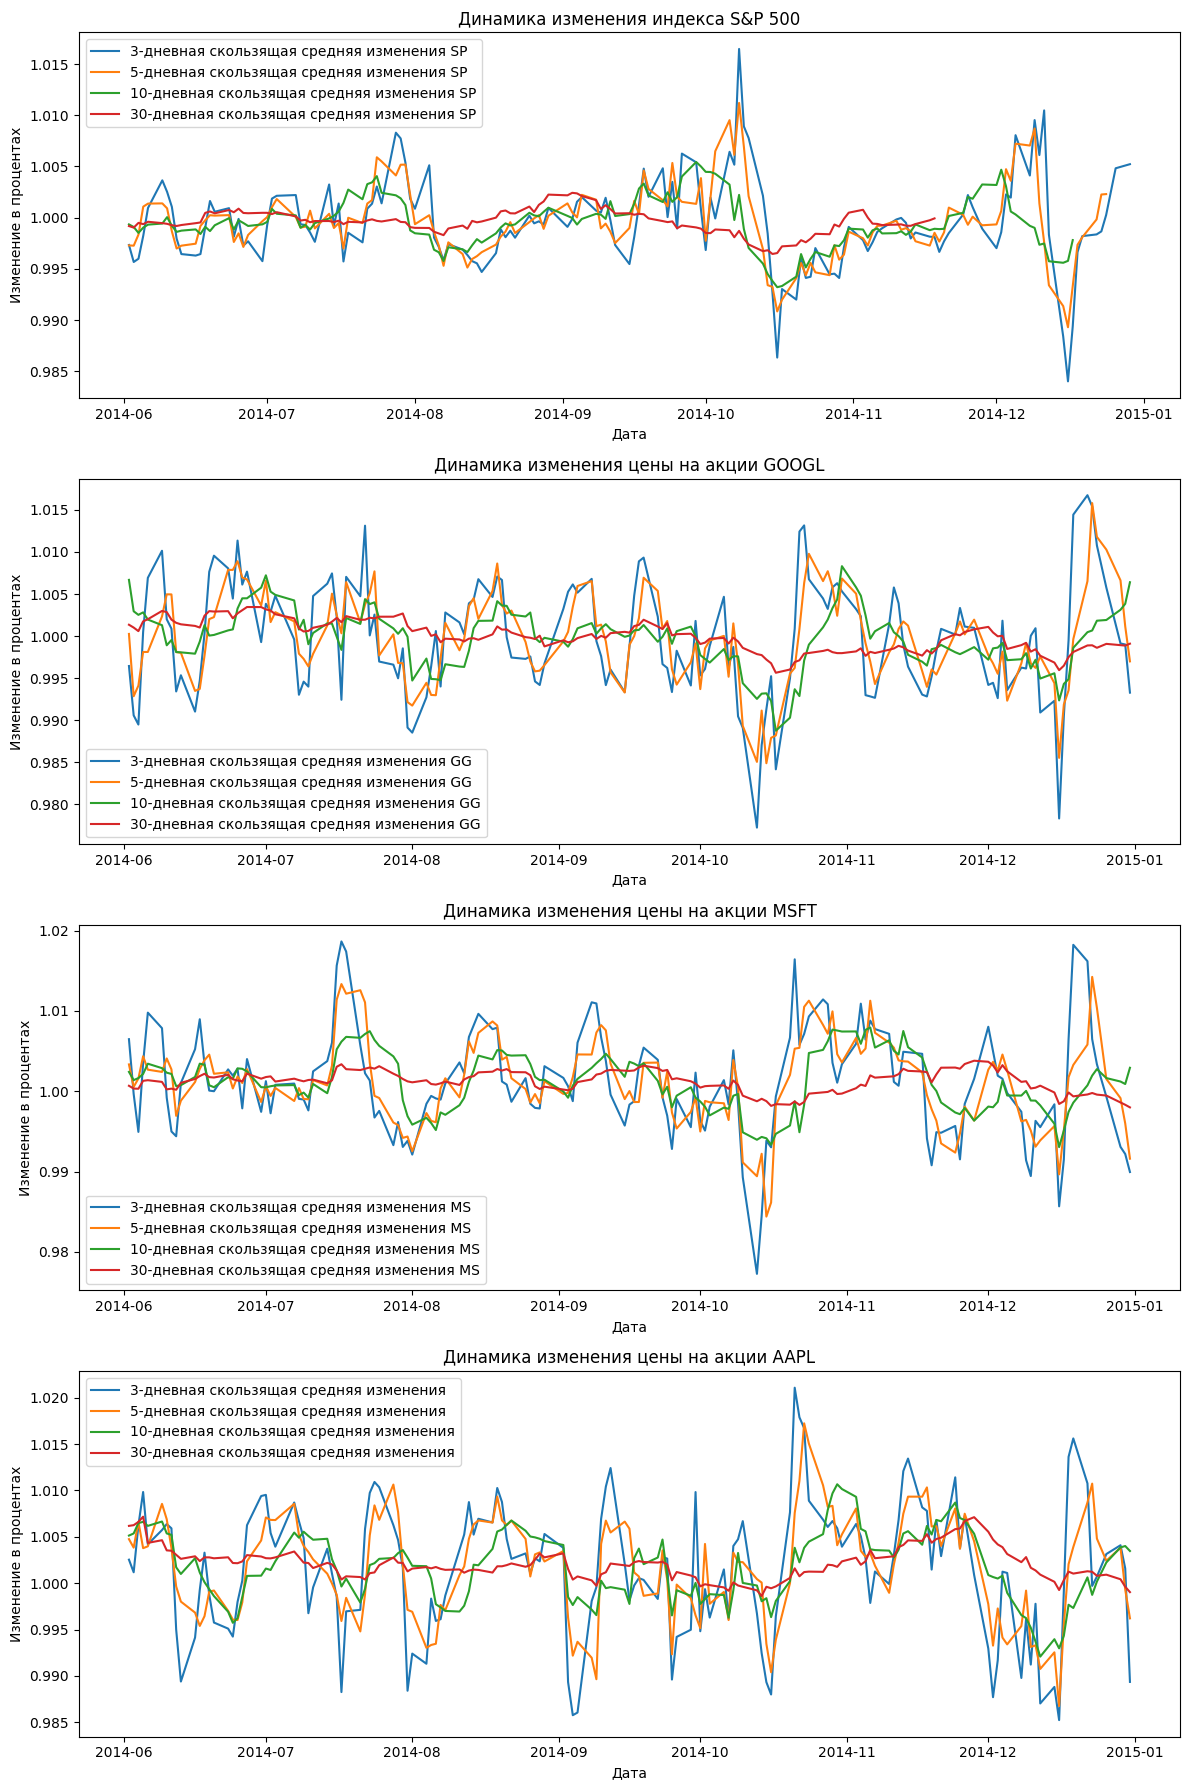

In [53]:
data_cl["chng_per_mean_3"] = data_cl["chng_percent"].rolling(window=3).mean()
data_cl["chng_per_mean_5"] = data_cl["chng_percent"].rolling(window=5).mean()
data_cl["chng_per_mean_10"] = data_cl["chng_percent"].rolling(window=10).mean()
data_cl["chng_per_mean_30"] = data_cl["chng_percent"].rolling(window=30).mean()

df_plot = data_cl.copy()
df_plot = df_plot[(df_plot['Date'] >= pd.to_datetime('2014-06-01')) & (df_plot['Date'] <= pd.to_datetime('2015-01-01'))]
df_plot.set_index('Date', inplace=True)

data_cl["chng_per_std_3"] = data_cl["chng_percent"].rolling(window=3).std()
data_cl["chng_per_std_5"] = data_cl["chng_percent"].rolling(window=5).std()
data_cl["chng_per_std_10"] = data_cl["chng_percent"].rolling(window=10).std()
data_cl["chng_per_std_30"] = data_cl["chng_percent"].rolling(window=30).std()

data_cl_sp["chng_per_mean_3"] = data_cl_sp["chng_percent"].rolling(window=3).mean()
data_cl_sp["chng_per_mean_5"] = data_cl_sp["chng_percent"].rolling(window=5).mean()
data_cl_sp["chng_per_mean_10"] = data_cl_sp["chng_percent"].rolling(window=10).mean()
data_cl_sp["chng_per_mean_30"] = data_cl_sp["chng_percent"].rolling(window=30).mean()

data_cl_sp["chng_per_std_3"] = data_cl_sp["chng_percent"].rolling(window=3).std()
data_cl_sp["chng_per_std_5"] = data_cl_sp["chng_percent"].rolling(window=5).std()
data_cl_sp["chng_per_std_10"] = data_cl_sp["chng_percent"].rolling(window=10).std()
data_cl_sp["chng_per_std_30"] = data_cl_sp["chng_percent"].rolling(window=30).std()

df_plot_sp = data_cl_sp.copy()
df_plot_sp = df_plot_sp[(df_plot_sp['Date'] >= pd.to_datetime('2014-06-01')) & (df_plot_sp['Date'] <= pd.to_datetime('2015-01-01'))]
df_plot_sp.set_index('Date', inplace=True)

data_cl_gg["chng_per_mean_3"] = data_cl_gg["chng_percent"].rolling(window=3).mean()
data_cl_gg["chng_per_mean_5"] = data_cl_gg["chng_percent"].rolling(window=5).mean()
data_cl_gg["chng_per_mean_10"] = data_cl_gg["chng_percent"].rolling(window=10).mean()
data_cl_gg["chng_per_mean_30"] = data_cl_gg["chng_percent"].rolling(window=30).mean()

data_cl_gg["chng_per_std_3"] = data_cl_gg["chng_percent"].rolling(window=3).std()
data_cl_gg["chng_per_std_5"] = data_cl_gg["chng_percent"].rolling(window=5).std()
data_cl_gg["chng_per_std_10"] = data_cl_gg["chng_percent"].rolling(window=10).std()
data_cl_gg["chng_per_std_30"] = data_cl_gg["chng_percent"].rolling(window=30).std()

df_plot_gg = data_cl_gg.copy()
df_plot_gg = df_plot_gg[(df_plot_gg['Date'] >= pd.to_datetime('2014-06-01')) & (df_plot_gg['Date'] <= pd.to_datetime('2015-01-01'))]
df_plot_gg.set_index('Date', inplace=True)

data_cl_ms["chng_per_mean_3"] = data_cl_ms["chng_percent"].rolling(window=3).mean()
data_cl_ms["chng_per_mean_5"] = data_cl_ms["chng_percent"].rolling(window=5).mean()
data_cl_ms["chng_per_mean_10"] = data_cl_ms["chng_percent"].rolling(window=10).mean()
data_cl_ms["chng_per_mean_30"] = data_cl_ms["chng_percent"].rolling(window=30).mean()

data_cl_ms["chng_per_std_3"] = data_cl_ms["chng_percent"].rolling(window=3).std()
data_cl_ms["chng_per_std_5"] = data_cl_ms["chng_percent"].rolling(window=5).std()
data_cl_ms["chng_per_std_10"] = data_cl_ms["chng_percent"].rolling(window=10).std()
data_cl_ms["chng_per_std_30"] = data_cl_ms["chng_percent"].rolling(window=30).std()

df_plot_ms = data_cl_ms.copy()
df_plot_ms = df_plot_ms[(df_plot_ms['Date'] >= pd.to_datetime('2014-06-01')) & (df_plot_ms['Date'] <= pd.to_datetime('2015-01-01'))]
df_plot_ms.set_index('Date', inplace=True)

plt.figure(figsize=(12, 18))

plt.subplot(4, 1, 1)
plt.plot(df_plot_sp["chng_per_mean_3"], label="3-дневная скользящая средняя изменения SP") 
plt.plot(df_plot_sp["chng_per_mean_5"], label="5-дневная скользящая средняя изменения SP") 
plt.plot(df_plot_sp["chng_per_mean_10"], label="10-дневная скользящая средняя изменения SP") 
plt.plot(df_plot_sp["chng_per_mean_30"], label="30-дневная скользящая средняя изменения SP") 
plt.xlabel("Дата")
plt.ylabel("Изменение в процентах") 
plt.title("Динамика изменения индекса S&P 500") 
plt.legend() 

plt.subplot(4, 1, 2)
plt.plot(df_plot_gg["chng_per_mean_3"], label="3-дневная скользящая средняя изменения GG") 
plt.plot(df_plot_gg["chng_per_mean_5"], label="5-дневная скользящая средняя изменения GG") 
plt.plot(df_plot_gg["chng_per_mean_10"], label="10-дневная скользящая средняя изменения GG") 
plt.plot(df_plot_gg["chng_per_mean_30"], label="30-дневная скользящая средняя изменения GG") 
plt.xlabel("Дата")
plt.ylabel("Изменение в процентах") 
plt.title("Динамика изменения цены на акции GOOGL") 
plt.legend() 

plt.subplot(4, 1, 3)
plt.plot(df_plot_ms["chng_per_mean_3"], label="3-дневная скользящая средняя изменения MS") 
plt.plot(df_plot_ms["chng_per_mean_5"], label="5-дневная скользящая средняя изменения MS") 
plt.plot(df_plot_ms["chng_per_mean_10"], label="10-дневная скользящая средняя изменения MS") 
plt.plot(df_plot_ms["chng_per_mean_30"], label="30-дневная скользящая средняя изменения MS") 
plt.xlabel("Дата")
plt.ylabel("Изменение в процентах") 
plt.title("Динамика изменения цены на акции MSFT") 
plt.legend() 

plt.subplot(4, 1, 4)
plt.plot(df_plot["chng_per_mean_3"], label="3-дневная скользящая средняя изменения") 
plt.plot(df_plot["chng_per_mean_5"], label="5-дневная скользящая средняя изменения") 
plt.plot(df_plot["chng_per_mean_10"], label="10-дневная скользящая средняя изменения") 
plt.plot(df_plot["chng_per_mean_30"], label="30-дневная скользящая средняя изменения") 
plt.title("Динамика изменения цены на акции AAPL") 
plt.xlabel("Дата")
plt.ylabel("Изменение в процентах") 
plt.legend() 

plt.tight_layout()

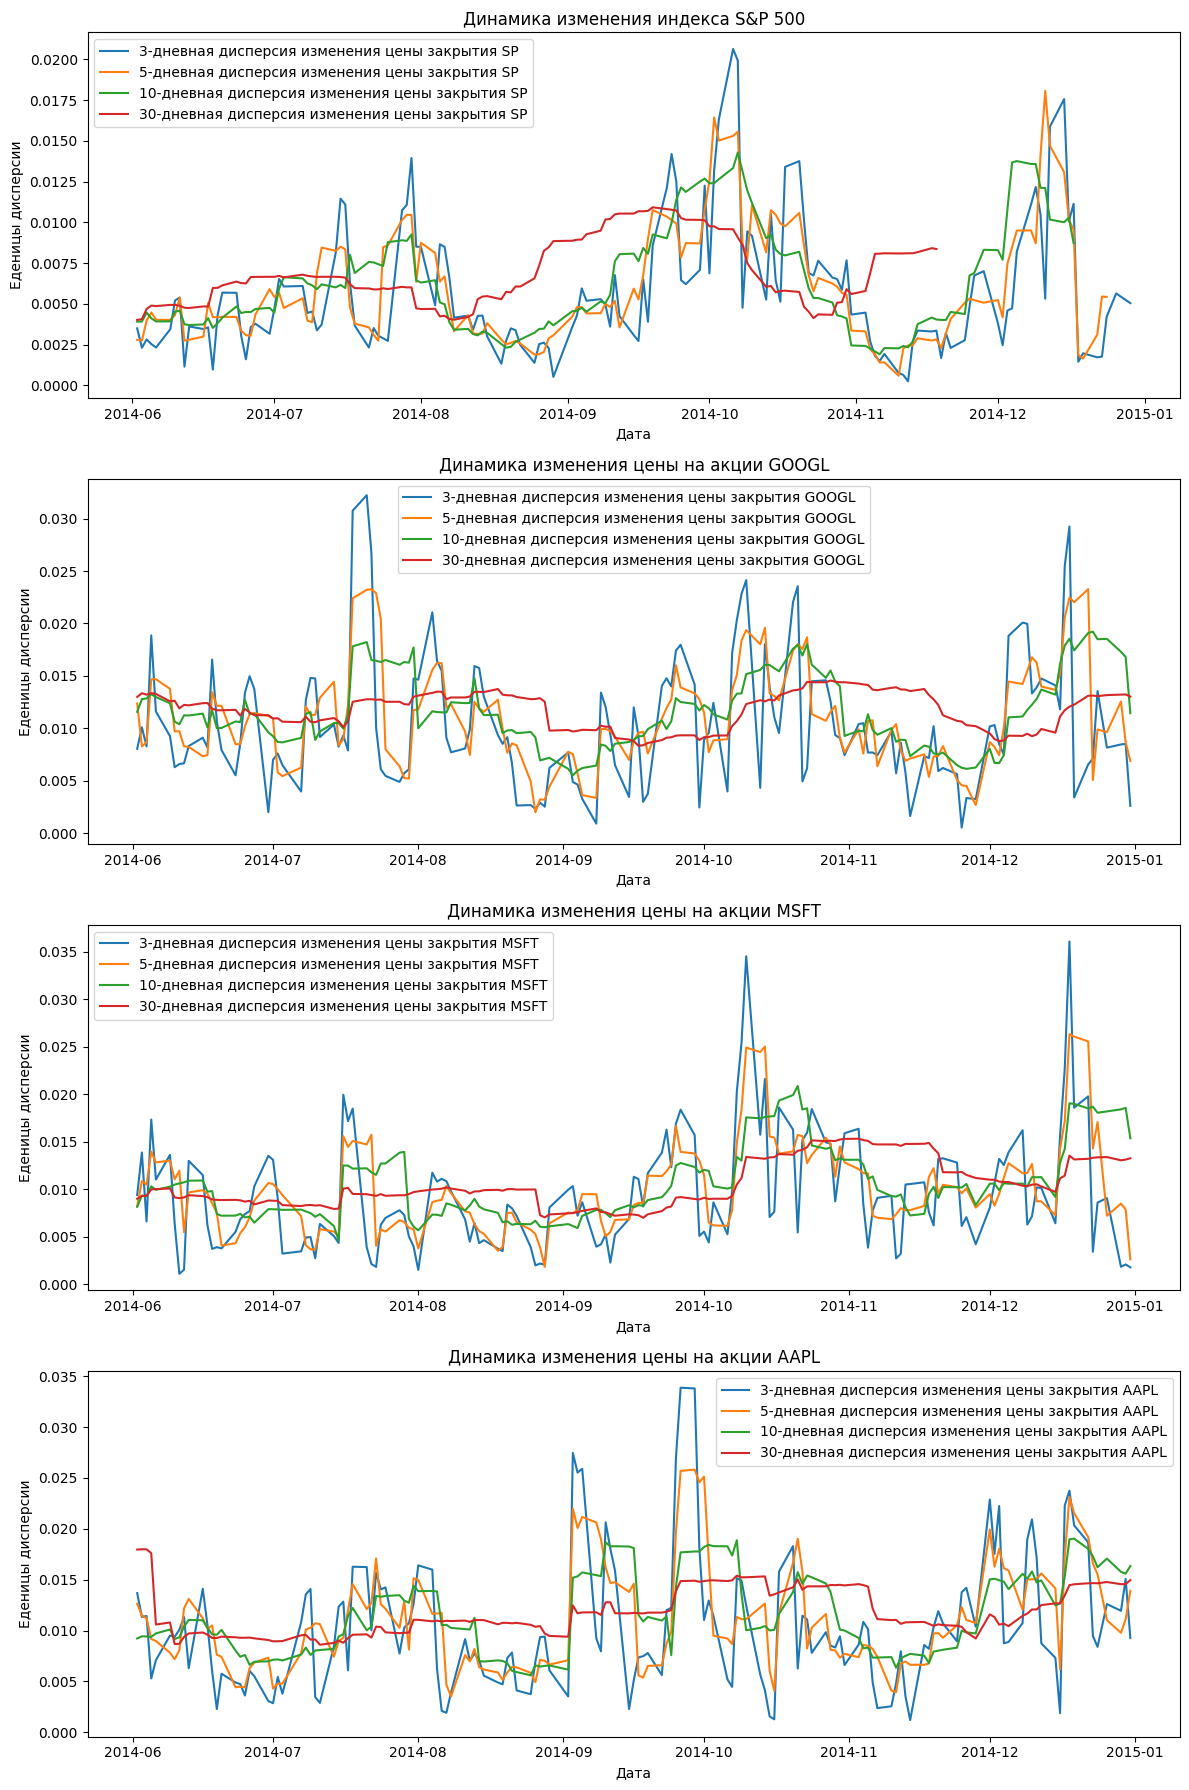

In [57]:
plt.figure(figsize=(12, 18))

plt.subplot(4, 1, 1)
plt.plot(df_plot_sp["chng_per_std_3"], label="3-дневная дисперсия изменения цены закрытия SP") 
plt.plot(df_plot_sp["chng_per_std_5"], label="5-дневная дисперсия изменения цены закрытия SP") 
plt.plot(df_plot_sp["chng_per_std_10"], label="10-дневная дисперсия изменения цены закрытия SP") 
plt.plot(df_plot_sp["chng_per_std_30"], label="30-дневная дисперсия изменения цены закрытия SP") 
plt.xlabel("Дата")
plt.ylabel("Еденицы дисперсии") 
plt.title("Динамика изменения индекса S&P 500") 
plt.legend() 

plt.subplot(4, 1, 2)
plt.plot(df_plot_gg["chng_per_std_3"], label="3-дневная дисперсия изменения цены закрытия GOOGL") 
plt.plot(df_plot_gg["chng_per_std_5"], label="5-дневная дисперсия изменения цены закрытия GOOGL") 
plt.plot(df_plot_gg["chng_per_std_10"], label="10-дневная дисперсия изменения цены закрытия GOOGL") 
plt.plot(df_plot_gg["chng_per_std_30"], label="30-дневная дисперсия изменения цены закрытия GOOGL") 
plt.xlabel("Дата")
plt.ylabel("Еденицы дисперсии")
plt.title("Динамика изменения цены на акции GOOGL") 
plt.legend() 

plt.subplot(4, 1, 3)
plt.plot(df_plot_ms["chng_per_std_3"], label="3-дневная дисперсия изменения цены закрытия MSFT") 
plt.plot(df_plot_ms["chng_per_std_5"], label="5-дневная дисперсия изменения цены закрытия MSFT") 
plt.plot(df_plot_ms["chng_per_std_10"], label="10-дневная дисперсия изменения цены закрытия MSFT") 
plt.plot(df_plot_ms["chng_per_std_30"], label="30-дневная дисперсия изменения цены закрытия MSFT") 
plt.xlabel("Дата")
plt.ylabel("Еденицы дисперсии")
plt.title("Динамика изменения цены на акции MSFT") 
plt.legend() 

plt.subplot(4, 1, 4)
plt.plot(df_plot["chng_per_std_3"], label="3-дневная дисперсия изменения цены закрытия AAPL") 
plt.plot(df_plot["chng_per_std_5"], label="5-дневная дисперсия изменения цены закрытия AAPL") 
plt.plot(df_plot["chng_per_std_10"], label="10-дневная дисперсия изменения цены закрытия AAPL") 
plt.plot(df_plot["chng_per_std_30"], label="30-дневная дисперсия изменения цены закрытия AAPL") 
plt.title("Динамика изменения цены на акции AAPL") 
plt.xlabel("Дата")
plt.ylabel("Еденицы дисперсии")
plt.legend() 

plt.tight_layout()